In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

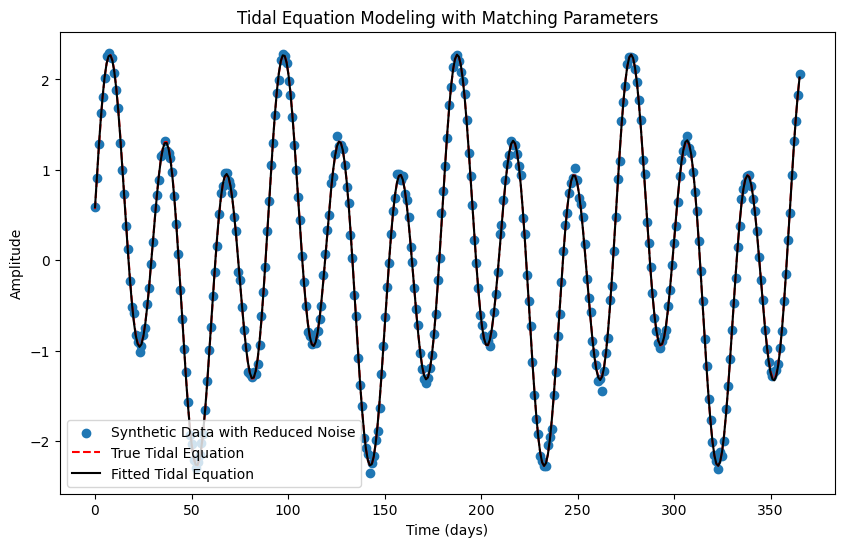

True Parameters: [1.5, 0.20943951023931953, 0, 0.8, 0.06981317007977318, 0.7853981633974483]
Fitted Parameters: [ 0.67372048  0.20944502 -0.61531396  0.798221    0.06969136  0.80900276
  1.02949428  0.20941035  0.39921711  0.00335256  0.08003772 -2.02407015]


In [17]:
def tidal_equation(t, *params):
    N = len(params) // 3  # Number of constituents
    result = 0
    for i in range(N):
        Ai, omega_i, phi_i = params[i * 3], params[i * 3 + 1], params[i * 3 + 2]
        result += Ai * np.sin(omega_i * t + phi_i)
    return result

# Generate synthetic data
np.random.seed(42)
t = np.linspace(0, 365, 365)  # time in days
true_params = [1.5, 2 * np.pi / 30, 0, 0.8, 2 * np.pi / 90, np.pi / 4]  # Example parameters
y_true = tidal_equation(t, *true_params)
noise = 0.05 * np.random.normal(size=len(t))  # Reduce noise
y_data = y_true + noise

# Fit the model to the data
num_constituents = len(true_params) // 3
initial_guess = [1.5, 2 * np.pi / 30, 0, 0.8, 2 * np.pi / 90, np.pi / 4] * num_constituents  # Use true values as initial guess
params, covariance = curve_fit(tidal_equation, t, y_data, p0=initial_guess)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(t, y_data, label="Synthetic Data with Reduced Noise")
plt.plot(t, tidal_equation(t, *true_params), 'r--', label="True Tidal Equation")
plt.plot(t, tidal_equation(t, *params), 'k-', label="Fitted Tidal Equation")

plt.title("Tidal Equation Modeling with Matching Parameters")
plt.xlabel("Time (days)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

print("True Parameters:", true_params)
print("Fitted Parameters:", params)